#TP4 : Apprentissage non-supervisé - Clustering -

##I- Clustering des données synthétiques via K-means


3) Générez des données synthétiques via le code suivant : 


In [1]:
from sklearn.datasets import make_blobs
import numpy as np

blob_centers = np.array([[ 0.2,  2.3],[-1.5 ,  2.3],[-2.8,  1.8],[-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [13]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,cluster_std=blob_std, random_state=7)

print(X)
print(y)

[[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]
[4 2 0 ... 3 0 2]




4) Affichez les données synthétiques générées via le code suivant :


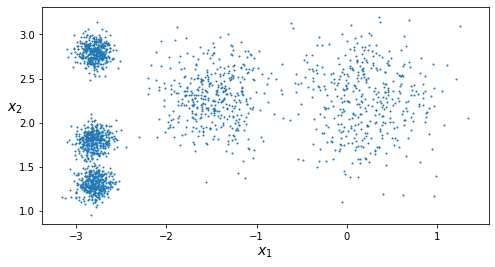

In [3]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

5) Appliquez la méthode KMeans (avec k=5) sur les données synthétiques (X)

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)

6) En utilisant la méthode fit_predict, prédisez et affichez les indices des cluster de X

In [25]:

predict_Kmean= kmeans.fit_predict(X)
print("Prédiction Kmeans =" ,predict_Kmean)





Prédiction Kmeans = [4 0 1 ... 2 1 0]


7) Calculez le NMI (Normalized Mutual Index) du modèle. Cet indice peut être obtenu via la fonction normalized_mutual_info_score du sous-module metrics du module sklearn


In [15]:
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,predict_Kmean)

0.9676600730451858

NMI (Normalized Mutual Index) = 0.9676600730451858

8) Affichez les abscisses et les ordonnées des centroïdes des cinq clusters via l'attribut cluster_centers_ de l'objet créé dans la question 5.a 

[[-2.80389616  1.80117999]
 [ 0.20876306  2.25551336]
 [-2.79290307  2.79641063]
 [-1.46679593  2.28585348]
 [-2.80037642  1.30082566]]


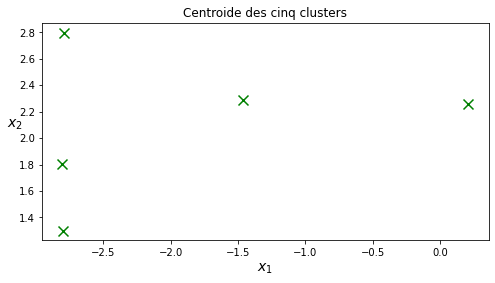

In [38]:
from matplotlib.pyplot import grid
import matplotlib.pyplot as plt
centroide=kmeans.cluster_centers_

print(centroide)

#plt.plot(centroide[0],kmeans.cluster_centers_[1])
#plt.title('centroïdes des cinq clusters')

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c="g", s=100,marker="x")
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
   


plt.figure(figsize=(8, 4))
plt.title('Centroide des cinq clusters')
plot_clusters(centroide)
plt.show()







1.   centroid 1 = [-2.80389616  1.80117999]
2.   centroide 2 = [ 0.20876306  2.25551336]
3.   centroide 3 = [-2.79290307  2.79641063]
4.   centroide 4 =  [-1.46679593  2.28585348]
5.   centroide 5 = [-2.80037642  1.30082566]


9) a) Créez la nouvelle instance

In [22]:
X_new = np.array([[-3, 2.5]])


[[-3.   2.5]]


9) b) Calculez la distance de X_new aux centroïdes des cinqs clusters via la méthode transform de la classe KMeans. Quel cluster a le centroïde le plus proche de X_new ?

In [23]:
distance = kmeans.transform(X_new)
print(distance)

[[0.72581411 3.21806371 0.36159148 1.54808703 1.21567622]]


 Quel cluster a le centroïde le plus proche de X_new ?
Le Troisième cluster a le centroide le plus proche de X_new (soit l'indice 2)  --> 0.36

c. Prédisez l'indice du cluster de X_new en utilisant la fonction predict. L'indice du cluster est conforme avec votre réponse à la question 9.b ?

In [39]:
indice_cluster_X_new=kmeans.predict(X_new)
print(indice_cluster_X_new)

[2]


On retrouve bien l'indice 2 comme nous l'avions suggéré à la question précédente car c''est la distance minimum avec l'indice 2 soit le 3ème centroide. 

##II- Clustering des images faciales via K-means


11) Importez la base de données fetch_olivetti_faces() depuis le sous-module datasets du module sklearn

In [40]:
from sklearn.datasets import fetch_olivetti_faces
data=fetch_olivetti_faces()


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


12) description de cette base de données

In [45]:
data.DESCR

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    ======

13) Indices de cluster de cette base de données

In [46]:
data.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

14) Données de cette base de données

In [55]:
dataBase=data.data
print(dataBase)

[[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]
 [0.45454547 0.47107437 0.5123967  ... 0.15289256 0.15289256 0.15289256]
 [0.3181818  0.40082645 0.49173555 ... 0.14049587 0.14876033 0.15289256]
 ...
 [0.5        0.53305787 0.607438   ... 0.17768595 0.14876033 0.19008264]
 [0.21487603 0.21900827 0.21900827 ... 0.57438016 0.59090906 0.60330576]
 [0.5165289  0.46280992 0.28099173 ... 0.35950413 0.3553719  0.38429752]]


15) Divisez cette base de données en bases d'apprentissage, de validation et de test

In [67]:
from sklearn.model_selection import train_test_split


#data_resplit, data_Train = train_test_split 
#data_Test, data_validation = train_test_split(data_resplit, test_size=0.5, train_size=0.5); 

X_train, X_test, y_train, y_test=train_test_split(dataBase,data.target,test_size=0.4, train_size=0.6);


X_test, X_validation,y_test,y_validation = train_test_split(X_test,y_test, test_size=0.5, train_size=0.5); 

print("X_train",X_train,"de taille:",len(X_train))
print("X_test",X_test,"de taille:",len(X_test))
print("y_train",y_train,"de taille:",len(y_train))
print("y_test",y_test,"de taille:",len(y_test))
print("X_validation",X_validation,"de taille:",len(X_validation))
print("y_validation",y_validation,"de taille:",len(y_validation))



X_train [[0.40082645 0.49586776 0.57024795 ... 0.16115703 0.1570248  0.13636364]
 [0.6983471  0.78099173 0.8057851  ... 0.47933885 0.5        0.677686  ]
 [0.18181819 0.338843   0.3553719  ... 0.39256197 0.45454547 0.45454547]
 ...
 [0.17768595 0.14049587 0.11570248 ... 0.20247933 0.2107438  0.21487603]
 [0.78099173 0.8181818  0.8305785  ... 0.14049587 0.11983471 0.11570248]
 [0.11570248 0.1446281  0.25619835 ... 0.34710744 0.23553719 0.1322314 ]] de taille: 240
X_test [[0.45454547 0.5041322  0.5041322  ... 0.38842976 0.38016528 0.47933885]
 [0.5        0.59090906 0.6280992  ... 0.10330579 0.10330579 0.09917355]
 [0.2520661  0.24380165 0.23966943 ... 0.18181819 0.16115703 0.19008264]
 ...
 [0.12396694 0.16528925 0.27272728 ... 0.22727273 0.14876033 0.35950413]
 [0.48347107 0.5206612  0.59090906 ... 0.13636364 0.11570248 0.09917355]
 [0.42975205 0.4752066  0.5123967  ... 0.2892562  0.3140496  0.33471075]] de taille: 80
y_train [39 30 21 37 36  2  5  1 30 24 12 26 20 34 12 23 31 21  9 24

16) Appliquez KMeans sur les données d'apprentissage avec k=40


In [69]:
kmeans_img = KMeans(n_clusters=40, random_state=0).fit(X_train)

17) Prédisez les indices de cluster des données de validation


In [72]:
predict_Kmean_img= kmeans.fit_predict(X_validation)
print("Prédiction Kmeans_img indices de cluster =" ,predict_Kmean_img)
#print(len(predict_Kmean_img))

Prédiction Kmeans_img indices de cluster = [4 0 3 4 4 2 0 4 1 1 2 2 4 2 0 3 3 3 4 1 4 0 2 3 1 1 1 3 3 4 4 0 4 4 2 2 1
 2 4 2 4 4 3 1 1 4 4 1 4 1 1 0 1 0 1 0 1 0 4 3 2 1 0 2 4 4 4 4 0 3 1 2 4 1
 4 2 1 1 4 2]
80


18) Calculez le NMI (Normalized Mutual Index) du modèle. 
Value = 0.5175725432186884

In [73]:
from sklearn.metrics.cluster import normalized_mutual_info_score

normalized_mutual_info_score(y_validation,predict_Kmean_img)

0.5175725432186884

19) Afficher les images faciales de validation et leurs cluster 

Cluster 0


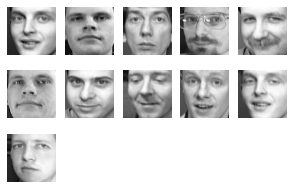

Cluster 1


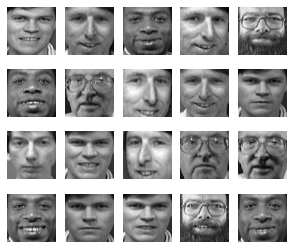

Cluster 2


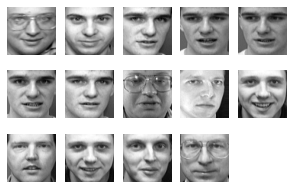

Cluster 3


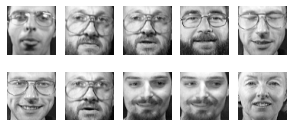

Cluster 4


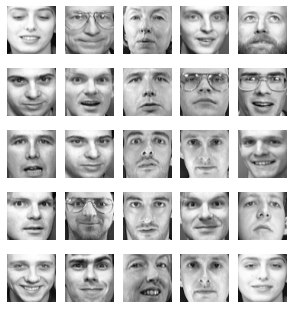

In [96]:
import numpy as np 
import matplotlib.pyplot as plt

def plot_faces(faces,n_cols=5):
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index in range(0, len(faces)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(faces[index].reshape(64, 64), cmap="gray")
        plt.axis("off")
    
    plt.show()
 



for cluster_id in np.unique(predict_Kmean_img):
    print("Cluster", cluster_id)    
    in_cluster = predict_Kmean_img == cluster_id
    faces = X_validation[in_cluster].reshape(-1, 64, 64)
    plot_faces(faces) 
 


